## Data Leakage, L1(Lasso) and L2 (Ridge) regularization using Linear Regression

We will use cross validation, lasso and ridge regression in this lab.

Specifically speaking, <br>
Regularization basically adds the penalty as model complexity increases.<br>
Cross validation is used to evaluate how well our model can generalize on the dataset. <br>

We will be using r2 score in this lab. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.


In this task, we will explore the following things on linear regression model:
- Cross Validation
- L1 regularization (Lasso regression)
- L2 regularization (Ridge regression)


#### Dataset
The dataset is available at "data/bike.csv" in the respective challenge's repo.<br>

The dataset is __modified version__ of the dataset 'bike.csv' provided by UCI Machine Learning repository.

Original dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### Objective
To learn about how cross validation, L1 regularization and L2 regularization work.

#### Tasks
- load the dataset.
- perform pre-processing on the data.
- remove registered feature and keep the casual feature to understand data leakage.
- construct train and test dataset.
- create a linear regression model.
- check the r2 score of the initial linear regression model on train and test dataset
- observe distribution of weights in the initial linear regression model. 
- split the dataset into k consecutive folds.
- calculate cross validation score for the k fold and check how well our model can generalize on the training dataset.
- checking the variance threshold of dataset and remove features with low variance.
- apply L1 regularization on the dataset and check the r2_score.
- visualize the distribution of weights on the lasso regression model.
- apply L2 regularization on the dataset and check the r2_score.
- visualize the distribution of weights on the ridge regression model. 

#### Further fun
- apply RFE on the dataset to automatically remove uneccessary features which would prevent overfitting.
- don't remove casual and registered features and check the effect of data leakage on the model
- implement lasso and ridge regression without using inbuilt librarires.
- apply elastic net to visualize the effect of both ridge and lasso regression.


#### Helpful links
- Cross validation : https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.
- Cross validation: https://scikit-learn.org/stable/modules/cross_validation.html
- L1 and L2 regularization : https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- L1 and L2 regularization : https://www.youtube.com/watch?v=9lRv01HDU0s&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=30&t=904s
- r2_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Data Leakage : "https://machinelearningmastery.com/data-leakage-machine-learning/
- sklearn k-fold : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- sklearn cross_val_score : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
- sklearn lasso regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso
- sklearn ridge regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge
- RFE : https://machinelearningmastery.com/rfe-feature-selection-in-python/
- RFE sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- Use slack for doubts: 

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

# Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

In [1]:
!wget https://raw.githubusercontent.com/DeepConnectAI/challenge-week-6/master/data/bike.csv

--2020-09-19 16:33:11--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-6/master/data/bike.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31376 (31K) [text/plain]
Saving to: ‘bike.csv’

bike.csv            100%[===================>]  30.64K  --.-KB/s    in 0.01s   

2020-09-19 16:33:11 (2.17 MB/s) - ‘bike.csv’ saved [31376/31376]



In [3]:
#load the data and inspect the first 5 rows
data = pd.read_csv("bike.csv")
data.head(5)

,id,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,12765,winter,2016,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,12766,winter,2016,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,12767,winter,2016,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,12768,winter,2016,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,12769,winter,2016,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576


In [4]:
# print the data types of each feature name
for i in data.columns:
    dt=data[i].dtype
    if dt=='object':
        data[i]=data[i].astype('category')

data.dtypes

id                             int64
season                      category
year                           int64
holiday                        int64
weekday                        int64
workingday                     int64
weather                     category
temp                         float64
feel_temp                    float64
hum                          float64
windspeed                    float64
promotion_level                int64
promotion_type                 int64
promotion_level_external       int64
promotion_type_external        int64
casual                         int64
registered                     int64
cnt                            int64
dtype: object

In [5]:
# check for null values in each column
data.isnull()

,id,season,year,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# print out the unique values of the features ['season', 'year', 'weather', 'promotion_type']
print(data.season.unique())
print(data.year.unique())
print(data.weather.unique())
print(data.promotion_type.unique())

[winter, spring, summer, autumn]
Categories (4, object): [winter, spring, summer, autumn]
[2016]
[cloud, fair, rain]
Categories (3, object): [cloud, fair, rain]
[1 0]


In [7]:
# print out the value counts (frequency of occurence) of the unique values in these features ['season', 'year', 'weather', 'promotion_type']
print(data.season.value_counts())
print(data.year.value_counts())
print(data.weather.value_counts())
print(data.promotion_type.value_counts())

summer    92
spring    92
autumn    91
winter    90
Name: season, dtype: int64
2016    365
Name: year, dtype: int64
fair     226
cloud    124
rain      15
Name: weather, dtype: int64
1    183
0    182
Name: promotion_type, dtype: int64


In [8]:
# print the shape of data
data.shape

(365, 18)

In [9]:
# drop the feature 'id' as it has no information to deliver.
data = data.drop('id', axis = 1)
data = data.drop('year', axis = 1)

In [10]:
# print the shape of data
print(data.shape)
data.head(5)

(365, 16)


,season,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt
0,winter,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880
1,winter,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795
2,winter,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304
3,winter,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521
4,winter,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576


In [13]:
# one hot encode the categorical columns.
col1=pd.get_dummies(data['season'],prefix="season")
col2=pd.get_dummies(data['weather'],prefix="weather")
col3=pd.get_dummies(data['promotion_type'],prefix="promotion_type")
data.head(10)

,season,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,casual,registered,cnt,season_autumn,season_spring,season_summer,season_winter,weather_cloud,weather_fair,weather_rain,promotion_type_0,promotion_type_1
0,winter,0,6,0,cloud,0.344167,0.363625,0.805833,0.160446,7,1,2,2,226,654,880,0,0,0,1,1,0,0,0,1
1,winter,0,0,0,cloud,0.363478,0.353739,0.696087,0.248539,8,1,8,1,125,670,795,0,0,0,1,1,0,0,0,1
2,winter,0,1,1,fair,0.196364,0.189405,0.437273,0.248309,3,1,10,2,75,1229,1304,0,0,0,1,0,1,0,0,1
3,winter,0,2,1,fair,0.200000,0.212122,0.590435,0.160296,0,1,8,3,67,1454,1521,0,0,0,1,0,1,0,0,1
4,winter,0,3,1,fair,0.226957,0.229270,0.436957,0.186900,2,0,5,1,58,1518,1576,0,0,0,1,0,1,0,1,0
5,winter,0,4,1,fair,0.204348,0.233209,0.518261,0.089565,0,0,10,3,63,1518,1581,0,0,0,1,0,1,0,1,0
6,winter,0,5,1,cloud,0.196522,0.208839,0.498696,0.168726,4,1,3,3,88,1362,1450,0,0,0,1,1,0,0,0,1
7,winter,0,6,0,cloud,0.165000,0.162254,0.535833,0.266804,6,1,9,1,78,891,969,0,0,0,1,1,0,0,0,1
8,winter,0,0,0,fair,0.138333,0.116175,0.434167,0.361950,5,1,8,0,70,768,838,0,0,0,1,0,1,0,0,1
9,winter,0,1,1,fair,0.150833,0.150888,0.482917,0.223267,4,0,2,2,30,1280,1310,0,0,0,1,0,1,0,1,0


In [14]:
data=pd.concat([data,col1,col2,col3],axis=1)

In [15]:
data.head(10)
data.columns

Index(['season', 'holiday', 'weekday', 'workingday', 'weather', 'temp',
       'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type',
       'promotion_level_external', 'promotion_type_external', 'casual',
       'registered', 'cnt', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter', 'weather_cloud', 'weather_fair', 'weather_rain',
       'promotion_type_0', 'promotion_type_1', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'weather_cloud',
       'weather_fair', 'weather_rain', 'promotion_type_0', 'promotion_type_1'],
      dtype='object')

In [16]:
# print the shape of data 
# notice the increase in the no. of features
data = data.drop('weather', axis = 1)
data = data.drop('season', axis = 1)
data = data.drop('promotion_type', axis = 1)
data.shape

(365, 31)

Notice that our target feature "cnt" is the sum of the features "registered" + "casual"<br>

To avoid data leakage remove the feature "casual" for the training purpose. <br>

To understand more about data leakage refer the article mentioned in the uselful links.

In [17]:
# Split the dataset into X and y
# While loading data into X drop the columns "cnt" and "casual". 
X = data[['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum','windspeed', 'promotion_level', 'promotion_level_external','promotion_type_external', 'registered','season_autumn', 'season_spring', 'season_summer', 'season_winter','weather_cloud', 'weather_fair', 'weather_rain', 'promotion_type_0','promotion_type_1']]

# notice the target variable is 'cnt'
y = data['cnt']

In [18]:
# store the names of the training features / name of the columns used for training. [Very important step for visualization later.]

train_columns = list(X.columns)
print(train_columns)

['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_level_external', 'promotion_type_external', 'registered', 'season_autumn', 'season_autumn', 'season_spring', 'season_spring', 'season_summer', 'season_summer', 'season_winter', 'season_winter', 'weather_cloud', 'weather_cloud', 'weather_fair', 'weather_fair', 'weather_rain', 'weather_rain', 'promotion_type_0', 'promotion_type_0', 'promotion_type_1', 'promotion_type_1']


In [19]:
# Apply scaling if our data is spread across wide differences of range values.
cols= ['temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_level_external', 'promotion_type_external', 'registered']
for i in cols:
    X[i]= (X[i]- X[i].min())/(X[i].max()-X[i].min())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
# print the type of X
X.head(5)
type(X)

pandas.core.frame.DataFrame

Note : <br>
Type of X should be pandas dataframe.
If not then convert X into pandas DataFrame object before proceeding further.


In [21]:
# convert X into pandas Dataframe
# in the parameters specify columns = train_columns.

X = pd.DataFrame(X, columns = train_columns)
X.head()

,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_level_external,promotion_type_external,registered,season_autumn,season_autumn,season_spring,season_spring,season_summer,season_summer,season_winter,season_winter,weather_cloud,weather_cloud,weather_fair,weather_fair,weather_rain,weather_rain,promotion_type_0,promotion_type_0,promotion_type_1,promotion_type_1
0,0,6,0,0.360789,0.373517,0.828620,0.284606,0.777778,0.111111,0.666667,0.056694,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1
1,0,0,0,0.385232,0.360541,0.715771,0.466215,0.888889,0.777778,0.333333,0.060505,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1
2,0,1,1,0.173705,0.144830,0.449638,0.465740,0.333333,1.000000,0.666667,0.193664,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1
3,0,2,1,0.178308,0.174649,0.607131,0.284297,0.000000,0.777778,1.000000,0.247261,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1
4,0,3,1,0.212429,0.197158,0.449313,0.339143,0.222222,0.444444,0.333333,0.262506,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0


In [22]:
# split the dataset into X_train, X_test, y_train, y_test
# play around with test sizes.

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
# print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 29)
(92, 29)
(273,)
(92,)


In [24]:
# build the Linear Regression model.
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# print the score on training set
y_pred_train = model.predict(X_train)
print("On Training set : ", r2_score(y_train, y_pred_train))

On Training set :  0.986513530066357


In [26]:
# print the score on the test set
y_pred_test = model.predict(X_test)
print("On testing set : ", r2_score(y_test, y_pred_test))

On testing set :  0.9873447978000681


Do not edit the code given below. Observe the distribution of weights. 
Which feature has the maximum coefficient ? <br>
Keep this figure as a base reference for visualizing the effects of l1-norm and l2-norm later in this notebook.

In [27]:
# custom summary function to plot the coefficients / weightage of the features.
def custom_summary(model, column_names, title):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle(title, fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

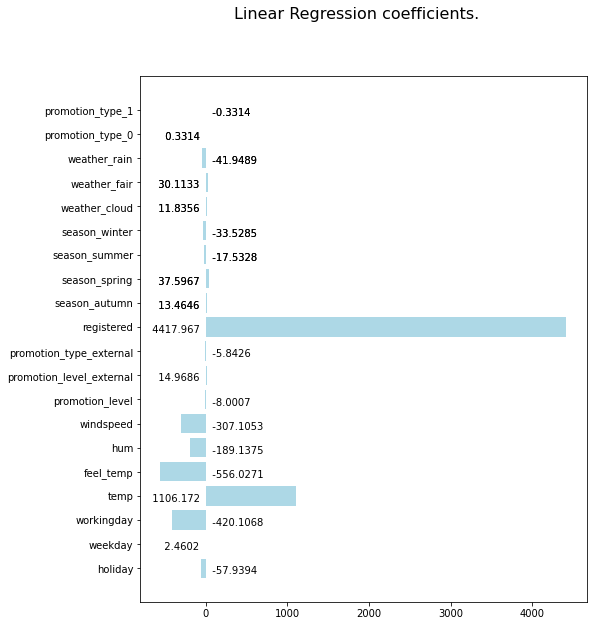

In [28]:
# coefficients plot
# let's call the above custom function.
custom_summary(model, train_columns, "Linear Regression coefficients.")

In [29]:
# evaluate the model with k = 10 Fold Cross validation

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
results = cross_val_score(model, X, y, scoring = 'r2', cv = folds)

print(type(model).__name__)
print("kFoldCV:")
print("Fold R2 scores:", results)
print("Mean R2 score:", results.mean())
print("Std R2 score:", results.std())
print("Generalizability on training set : ", results.mean(), " +/- ", results.std())

LinearRegression
kFoldCV:
Fold R2 scores: [0.98768532 0.99265086 0.98379617 0.96978406 0.98632629 0.99056935
 0.97901286 0.98697633 0.98746441 0.97713913]
Mean R2 score: 0.9841404784568079
Std R2 score: 0.006570598831867186
Generalizability on training set :  0.9841404784568079  +/-  0.006570598831867186


Feature Selection using Variance Thresholding

In [30]:
print("Original shape of X_train : ", X_train.shape)

Original shape of X_train :  (273, 29)


In [31]:
# check the variance of X.
# Note the type(X) should be a pandas DataFrame as stated earlier.

X.var()

holiday                     0.026720
weekday                     4.024658
workingday                  0.216393
temp                        0.057592
feel_temp                   0.049115
hum                         0.023394
windspeed                   0.025126
promotion_level             0.044400
promotion_level_external    0.104256
promotion_type_external     0.134599
registered                  0.063770
season_autumn               0.187671
season_autumn               0.187671
season_spring               0.189041
season_spring               0.189041
season_summer               0.189041
season_summer               0.189041
season_winter               0.186286
season_winter               0.186286
weather_cloud               0.224928
weather_cloud               0.224928
weather_fair                0.236444
weather_fair                0.236444
weather_rain                0.039515
weather_rain                0.039515
promotion_type_0            0.250685
promotion_type_0            0.250685
p

Remove low variance features using Variance Threshold. 

Note : If the variance is less, it implies the values of that particular feature spans limited range of values.

In [32]:
# play around with the threshold values

sel = VarianceThreshold(threshold = (0.001))
sel.fit(X_train)

VarianceThreshold(threshold=0.001)

In [33]:
# do not edit.

selected_features = list(X_train.columns[sel.get_support()])
print("Selected features : ", selected_features)
print("Removed features : ", list(X_train.columns[~sel.get_support()]))

Selected features :  ['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_level_external', 'promotion_type_external', 'registered', 'season_autumn', 'season_autumn', 'season_spring', 'season_spring', 'season_summer', 'season_summer', 'season_winter', 'season_winter', 'weather_cloud', 'weather_cloud', 'weather_fair', 'weather_fair', 'weather_rain', 'weather_rain', 'promotion_type_0', 'promotion_type_0', 'promotion_type_1', 'promotion_type_1']
Removed features :  []


In [34]:
# Delete the removed features from the train_columns list.
removed_features=list(X_train.columns[~sel.get_support()])
for i in removed_features:
    train_columns.remove(i)

In [35]:
#transform / remove the low variance features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

## Lasso Regression : L1 - norm

In [36]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_lasso = Lasso(alpha = alpha)

#fit the model on training data
model_lasso.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_lasso.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.9852572676253907


In [37]:
#evaluate the model on testing data
y_pred_test = model_lasso.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9908025573753062


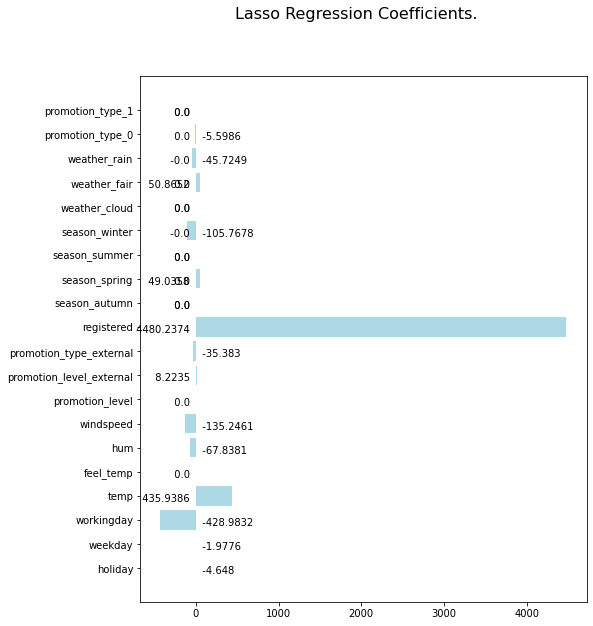

In [38]:
# visualize the coefficients.
# compare the results with the plot obtained earlier.

custom_summary(model_lasso, train_columns, "Lasso Regression Coefficients.")

We can see that Lasso regression has automatically done a lot of feature selection. Some columns might have zero coefficients. It has been effectively removed. <br> 
The model is much more interpretable than the baseline linear regression model.
<br>
Hence, Lasso regression has embedded Feature Selection.

# Ridge Regression : L2 - norm

In [39]:
from sklearn.linear_model import Ridge

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_ridge = Ridge(alpha = 1.0)

#fit the model on training data
model_ridge.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_ridge.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))


On train set :  0.9793210875656333


In [40]:
#evaluate the model on testing data
y_pred_test = model_ridge.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9853806989414429


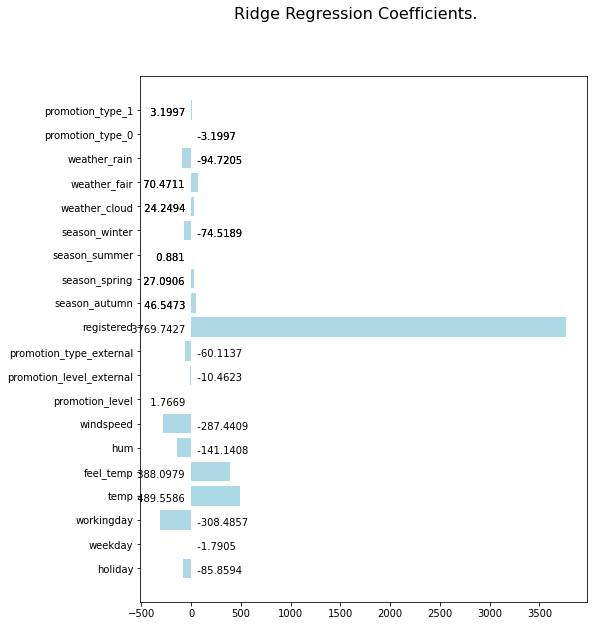

In [41]:
# visualize the coefficients.
# compare the results with the plot obtained earlier.

custom_summary(model_ridge, train_columns, "Ridge Regression Coefficients.")

Ridge regression doesn't drive smaller coefficients to 0 hence it doesn't possess internal feature selection.